In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobiles-dataset-from-flipkart/flipkart_mobiles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
import missingno as msno

In [3]:
df=pd.read_csv('/kaggle/input/mobiles-dataset-from-flipkart/flipkart_mobiles.csv')

In [4]:
df

,Name,Brand,Ratings,No_of_ratings,No_of_reviews,Product_features,MSP,MRP,Discount
0,"realme 9i (Prism Blue, 64 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31
1,"realme 9i (Prism Black, 64 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31
2,"realme 9i (Prism Blue, 128 GB)",realme,4.5,25380,1517,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,13499,17999,25
3,"realme 9i (Prism Black, 128 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35
4,"realme 9i (Prism Blue, 128 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35
...,...,...,...,...,...,...,...,...,...
617,"MOTOROLA e32 (Eco Black, 64 GB)",MOTOROLA,4.2,123,16,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,9499,11999,20
618,"REDMI Note 9 (Pebble Grey, 128 GB)",REDMI,4.3,"1,23,381",9426,['4 GB RAM | 128 GB ROM | Expandable Upto 512 ...,13499,16499,18
619,"SAMSUNG Galaxy A13 (Blue, 128 GB)",SAMSUNG,4.1,247,19,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,16999,20990,19
620,"REDMI Note 11 Pro (Star Blue, 128 GB)",REDMI,4.1,611,43,"['8 GB RAM | 128 GB ROM', '16.94 cm (6.67 inch...",19395,20689,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              622 non-null    object 
 1   Brand             622 non-null    object 
 2   Ratings           622 non-null    float64
 3   No_of_ratings     622 non-null    object 
 4   No_of_reviews     622 non-null    int64  
 5   Product_features  622 non-null    object 
 6   MSP               622 non-null    object 
 7   MRP               622 non-null    object 
 8   Discount          622 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 43.9+ KB


In [6]:
df.describe()

,Ratings,No_of_reviews,Discount
count,622.000000,622.000000,622.000000
mean,4.267203,3393.704180,18.442122
std,0.188438,5212.468223,11.195627
min,3.400000,0.000000,1.000000
25%,4.200000,201.000000,9.000000
50%,4.300000,1277.000000,18.000000
75%,4.400000,4608.000000,28.000000
max,4.800000,34744.000000,46.000000


In [7]:
df.nunique()

Name                540
Brand                30
Ratings              14
No_of_ratings       321
No_of_reviews       293
Product_features    360
MSP                 221
MRP                 203
Discount             42
dtype: int64

# Detailed EDA

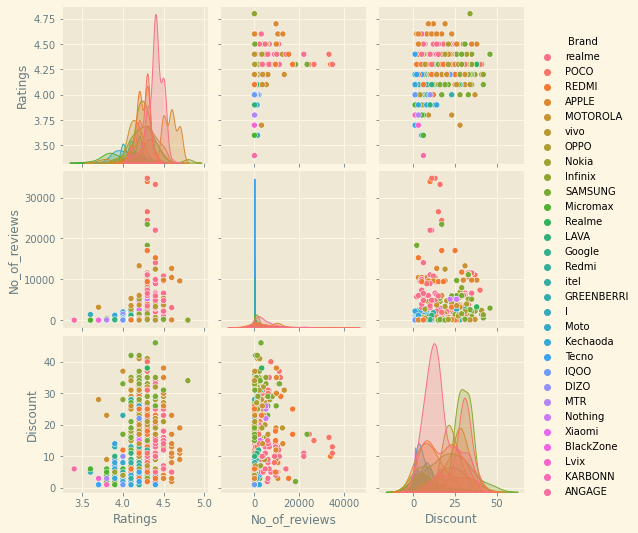

In [8]:
sns.pairplot(df, hue='Brand')

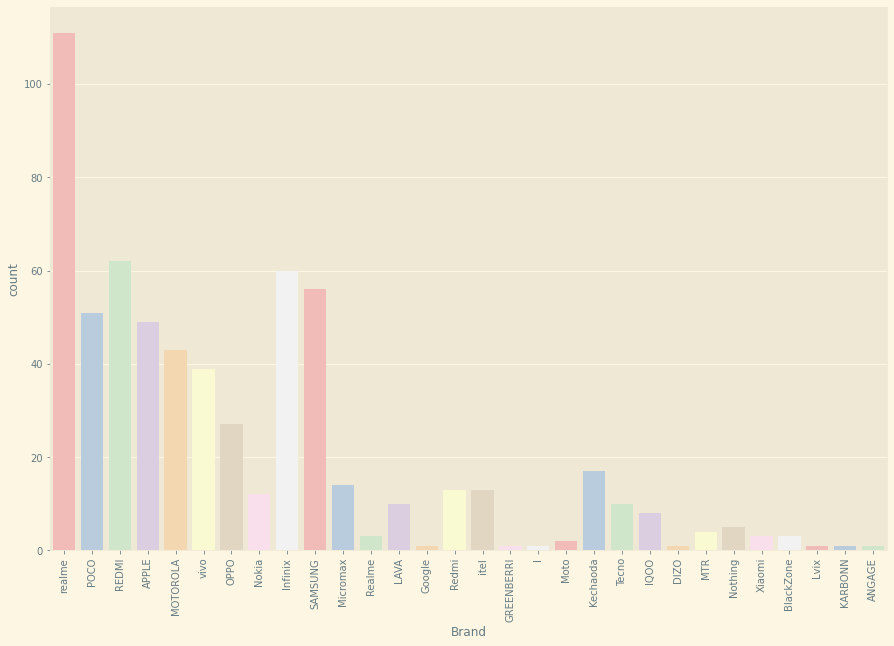

In [9]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(data=df,x="Brand",palette="Pastel1")
plt.show()

<AxesSubplot:xlabel='No_of_reviews'>

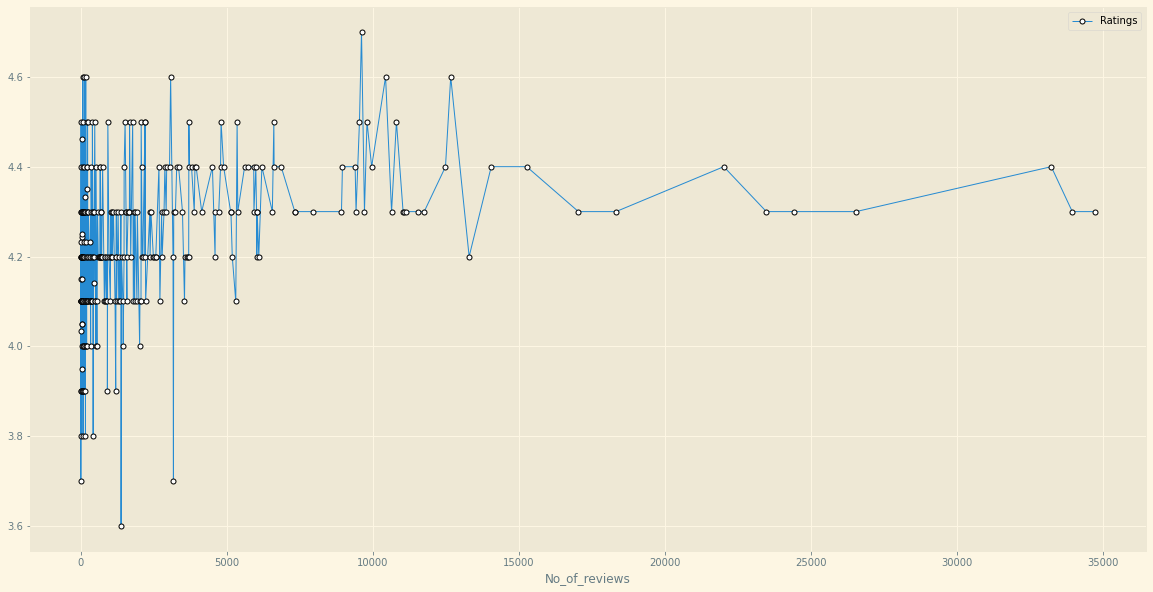

In [10]:
plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
agebmi=pd.pivot_table(df,index='No_of_reviews',values='Ratings',aggfunc='mean')
agebmi.plot(kind='line',figsize=(20,10),title='',marker="o",linewidth=1,markersize=5,markerfacecolor="white",markeredgecolor="black",markeredgewidth=1)

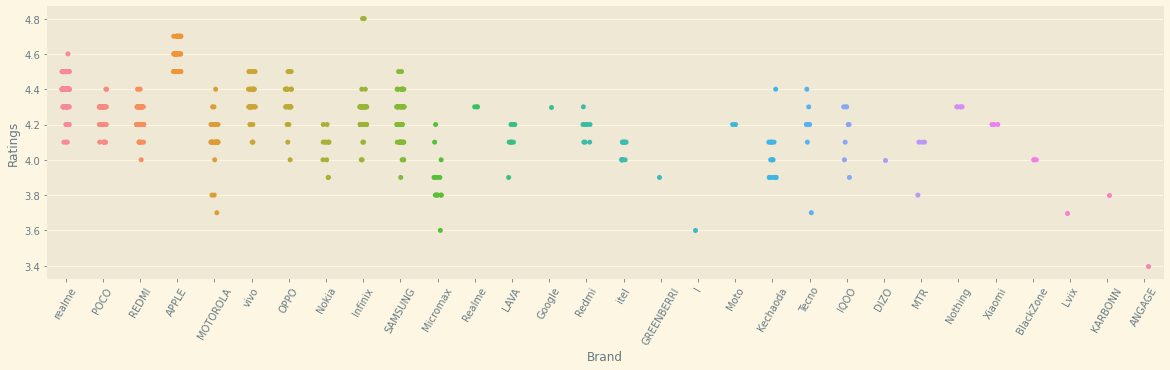

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=60)
ax = sns.stripplot(y="Ratings", x="Brand", data=df)

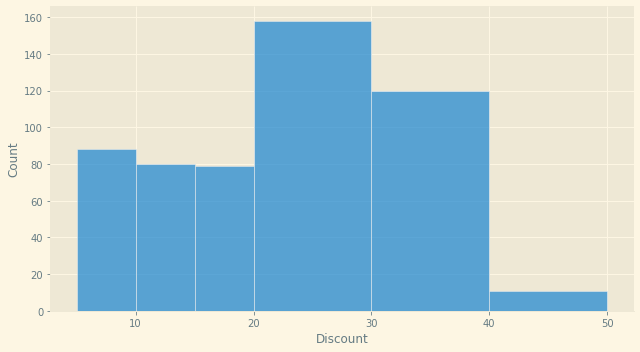

In [12]:
sns.displot(df, x= 'Discount',bins=[5,10,15,20,30,40,50], aspect=1.8)

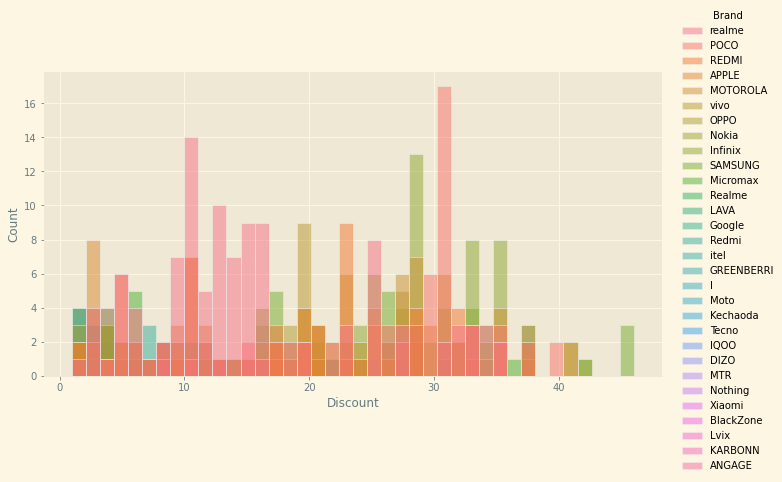

In [13]:
sns.displot(df, x='Discount',bins=40, hue='Brand',aspect=1.9)

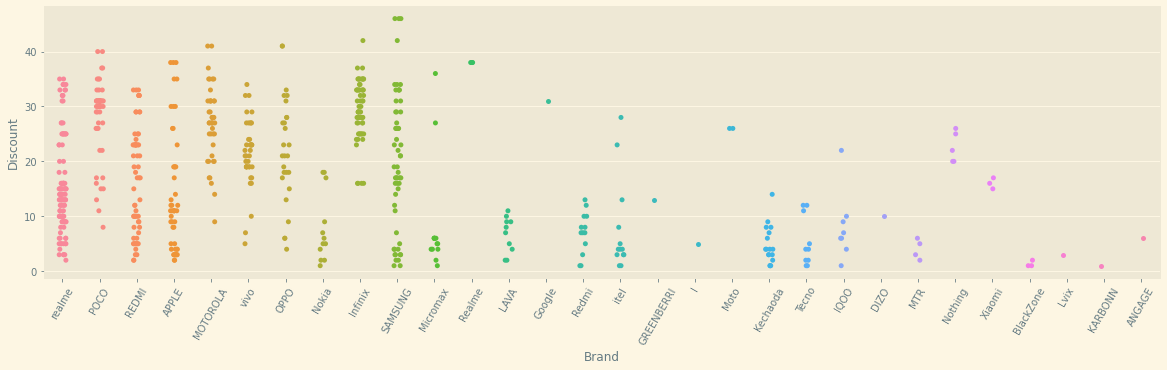

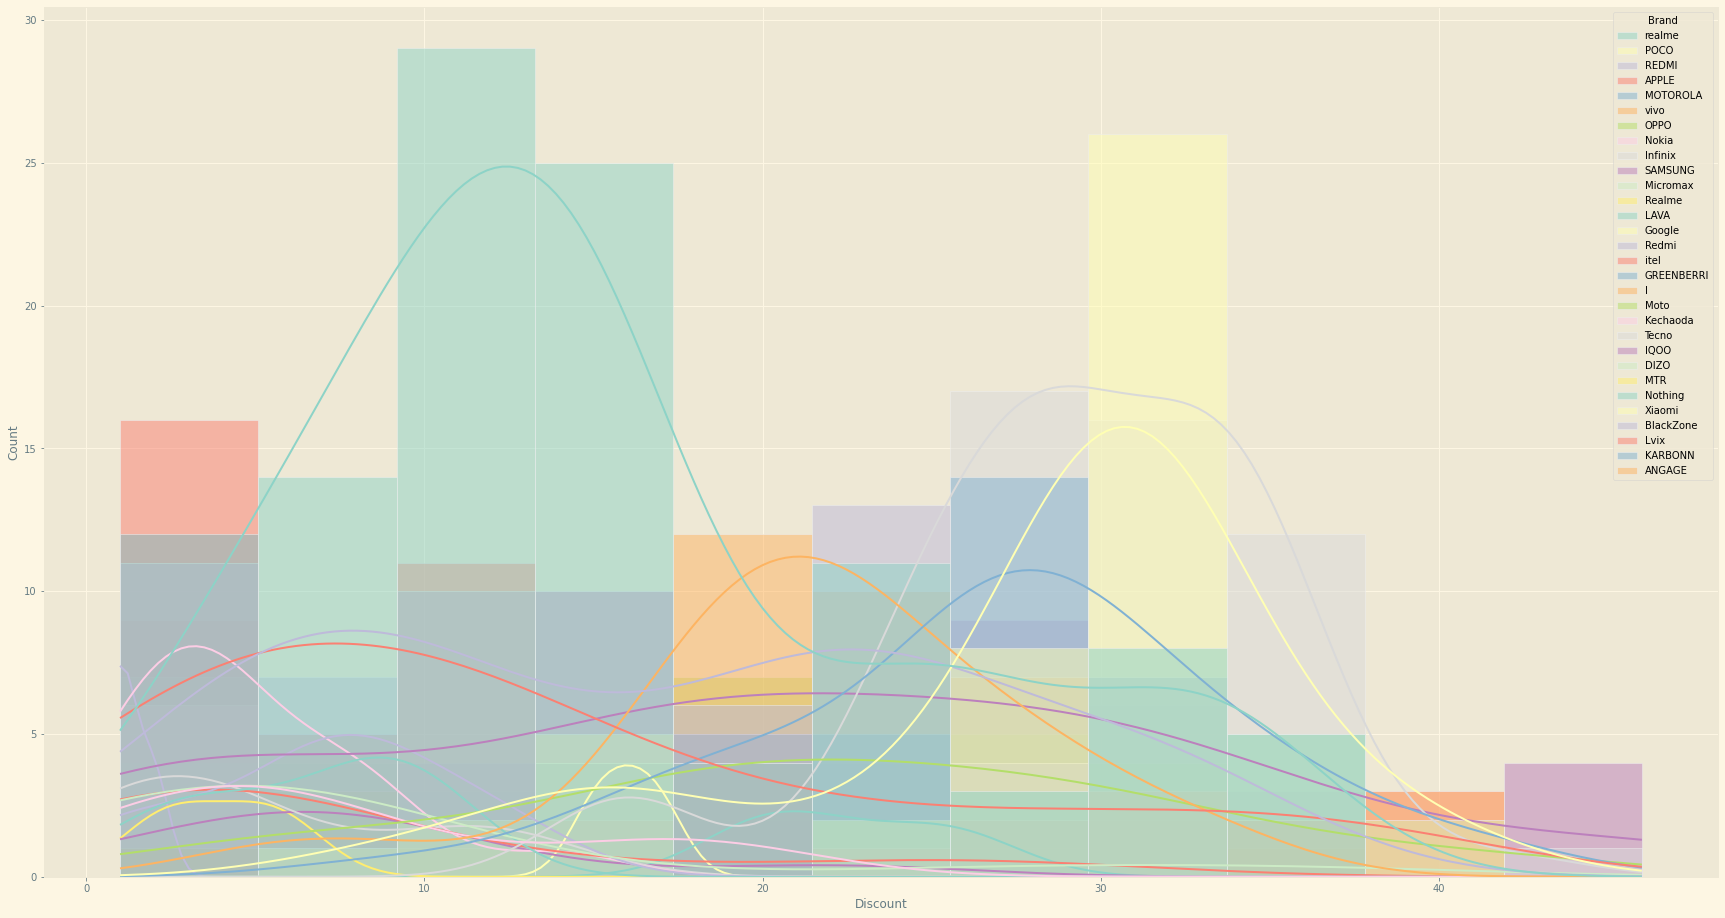

In [14]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=60)
ax = sns.stripplot(y="Discount", x="Brand", data=df)
plt.figure(figsize=(30,16));
sns.histplot(x='Discount',data=df,hue='Brand',kde=True,palette='Set3');

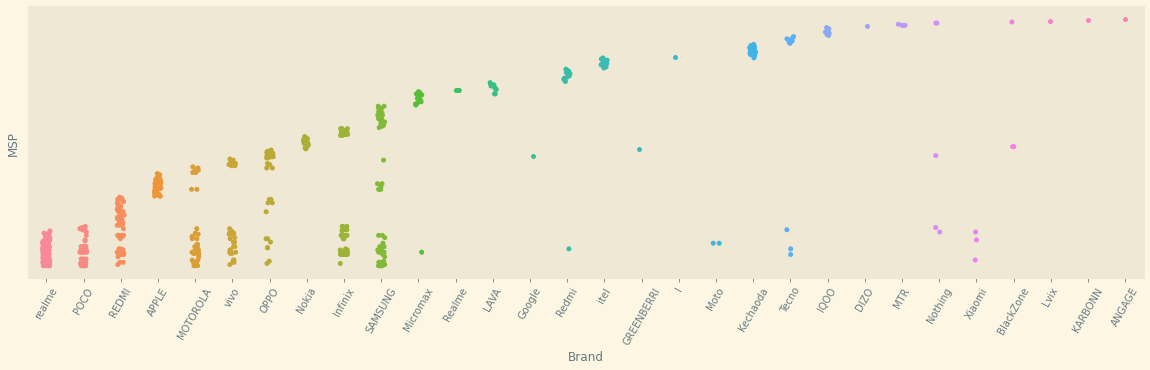

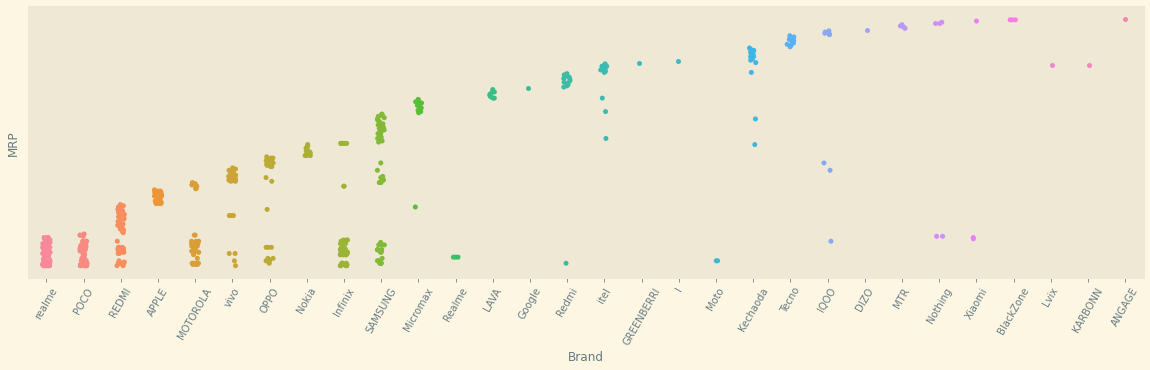

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=60)
plt.yticks([])
ax = sns.stripplot(y="MSP", x="Brand", data=df)

fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=60)
plt.yticks([])
ax = sns.stripplot(y="MRP", x="Brand", data=df)

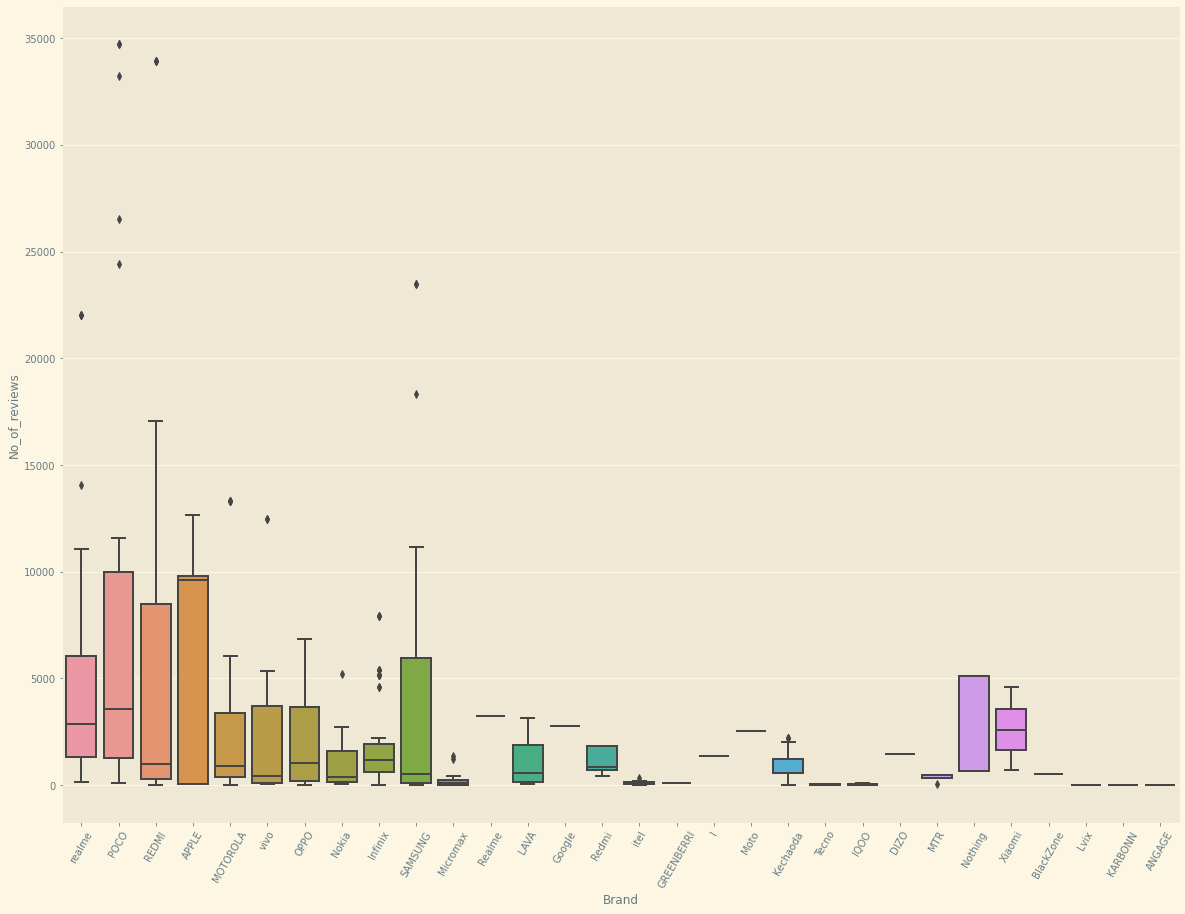

In [16]:
fig, ax = plt.subplots(figsize=(20,15))
plt.xticks(rotation=60)
ax = sns.boxplot(x="Brand", y="No_of_reviews", data=df)

In [17]:
df.groupby('Brand')['Discount'].mean().sort_values(ascending=False)

Brand
Realme        38.000000
Google        31.000000
Infinix       29.366667
POCO          28.235294
MOTOROLA      27.000000
Moto          26.000000
Nothing       22.600000
OPPO          22.148148
vivo          21.666667
SAMSUNG       20.303571
REDMI         16.758065
Xiaomi        16.000000
realme        15.522523
APPLE         13.836735
GREENBERRI    13.000000
DIZO          10.000000
Micromax       8.428571
IQOO           8.125000
Nokia          7.833333
itel           7.692308
Redmi          7.076923
LAVA           6.700000
ANGAGE         6.000000
Tecno          5.400000
I              5.000000
Kechaoda       4.823529
MTR            4.000000
Lvix           3.000000
BlackZone      1.333333
KARBONN        1.000000
Name: Discount, dtype: float64

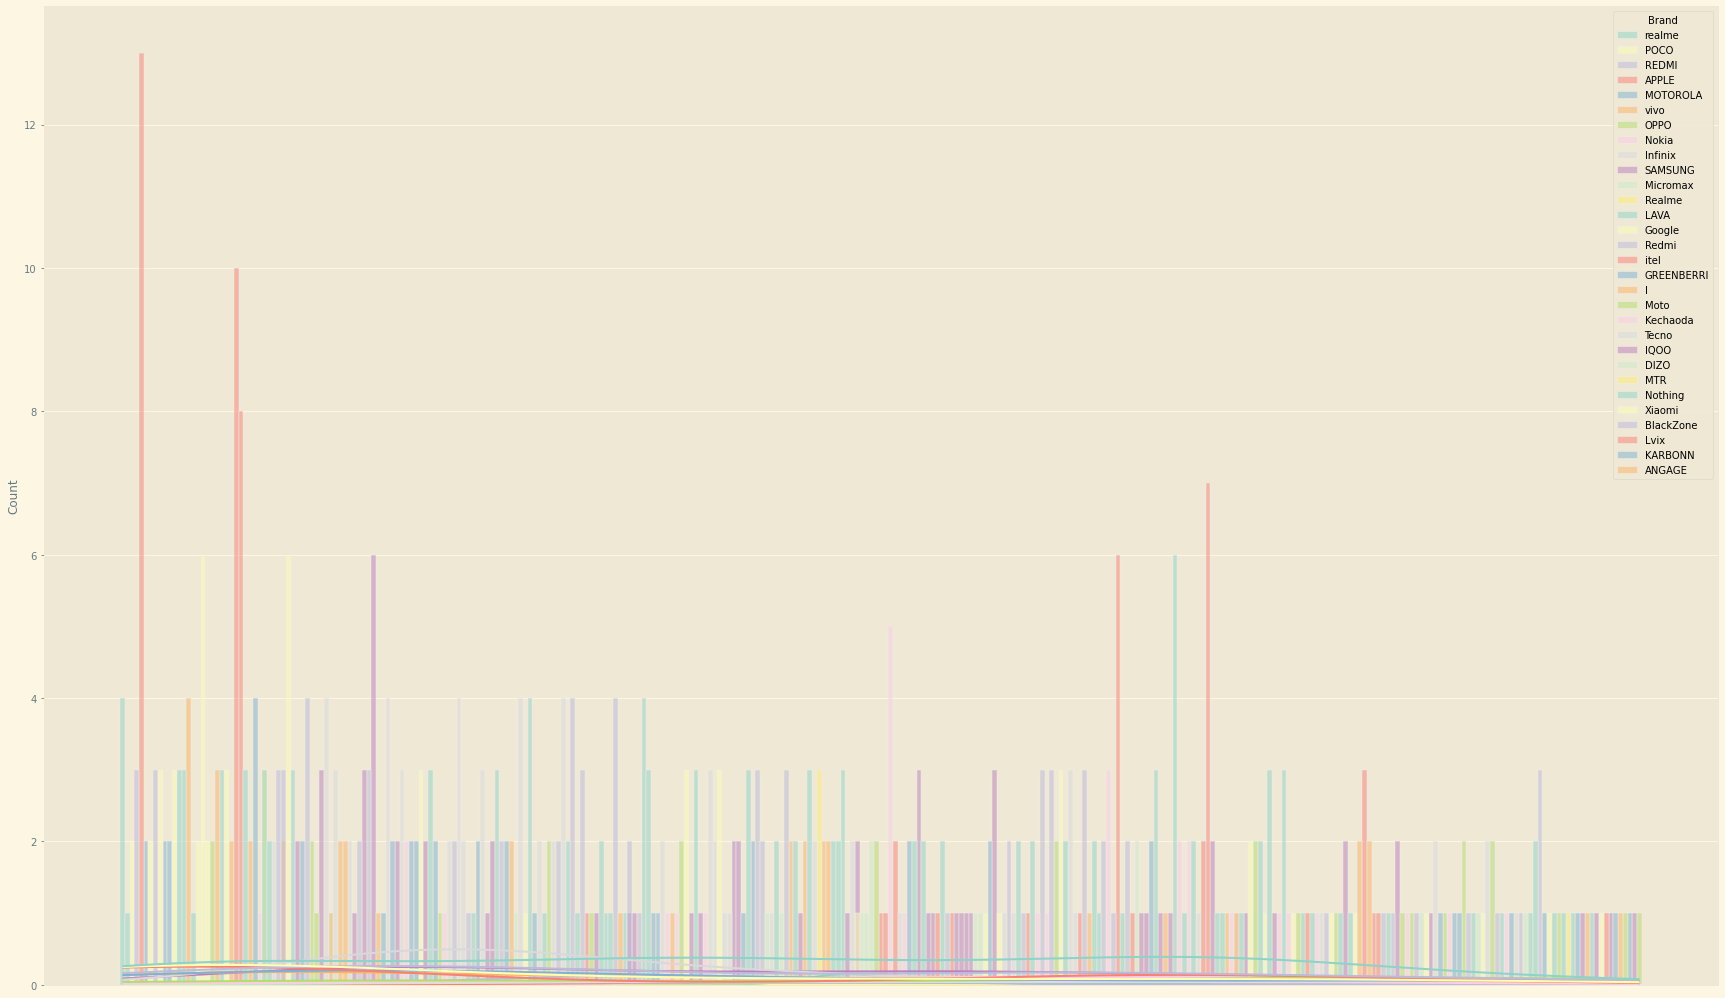

In [18]:
plt.figure(figsize=(30,18));

plt.xticks([])
sns.histplot(x='No_of_ratings',data=df,hue='Brand',kde=True,palette='Set3');

# Hi, thank you so much for reading to the end, i just recently started doing analytics and your advice and comments are important to me. Don't forget to upvote this notebook if you like it!